<a href="https://colab.research.google.com/github/jaswanthmathan/-K-Means-Clustering/blob/main/JASWANTH_DAY53_DIY_SOLUTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q1. Problem Statement: K Means Clustering
Write a Python program that reads the Credit Card Customer Data.csv (provided
on LMS). The following are the tasks that need to be considered while
constructing the solution to Segregate customers based on the data provided
with the help of k-means clustering.
1. Load the Given CSV file into a DataFrame
2. Find missing values and drop the unnecessary columns
3. Univariate and bivariate analysis
4. Standardize the whole dataset
5. Find the within-cluster sum of square
6. Find the silhouette score
7. Use a line plot using matplotlib to find scores for different sizes of K and
choose the best size for the cluster and build the final model
8. Observe Cluster behavior with different columns.
9. Print Co-ordinates of all centroids and silhouette scores for the final model


In [3]:
import pandas as pd

df = pd.read_csv('Credit Card Customer Data.csv')
print(df)


     Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
0        1         87073            100000                   2   
1        2         38414             50000                   3   
2        3         17341             50000                   7   
3        4         40496             30000                   5   
4        5         47437            100000                   6   
..     ...           ...               ...                 ...   
655    656         51108             99000                  10   
656    657         60732             84000                  10   
657    658         53834            145000                   8   
658    659         80655            172000                  10   
659    660         80150            167000                   9   

     Total_visits_bank  Total_visits_online  Total_calls_made  
0                    1                    1                 0  
1                    0                   10                 9  
2              

In [4]:
df.info()

df.drop(columns=['Sl_No', 'Customer Key'], inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


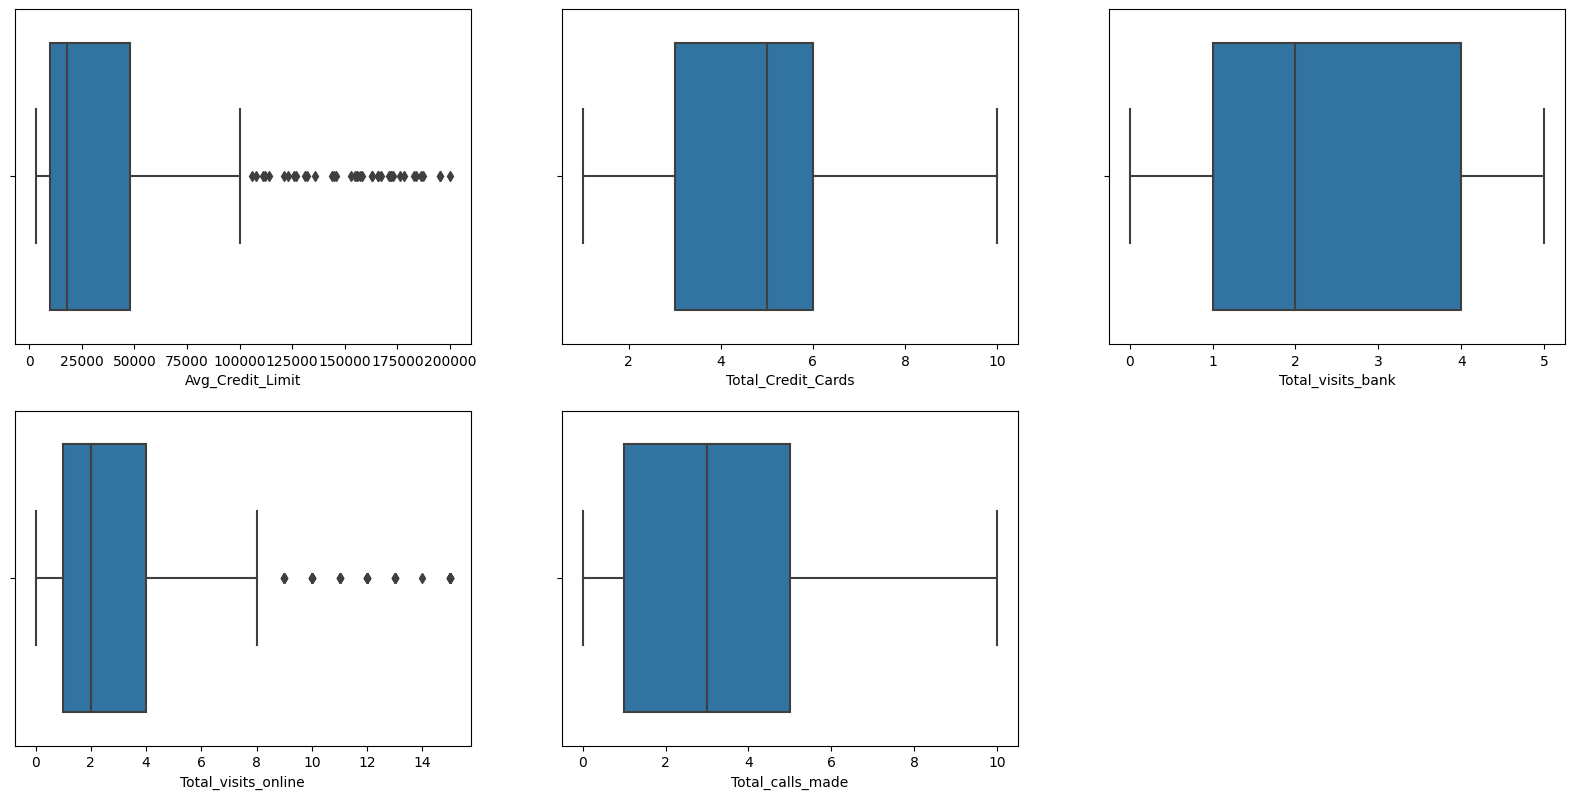

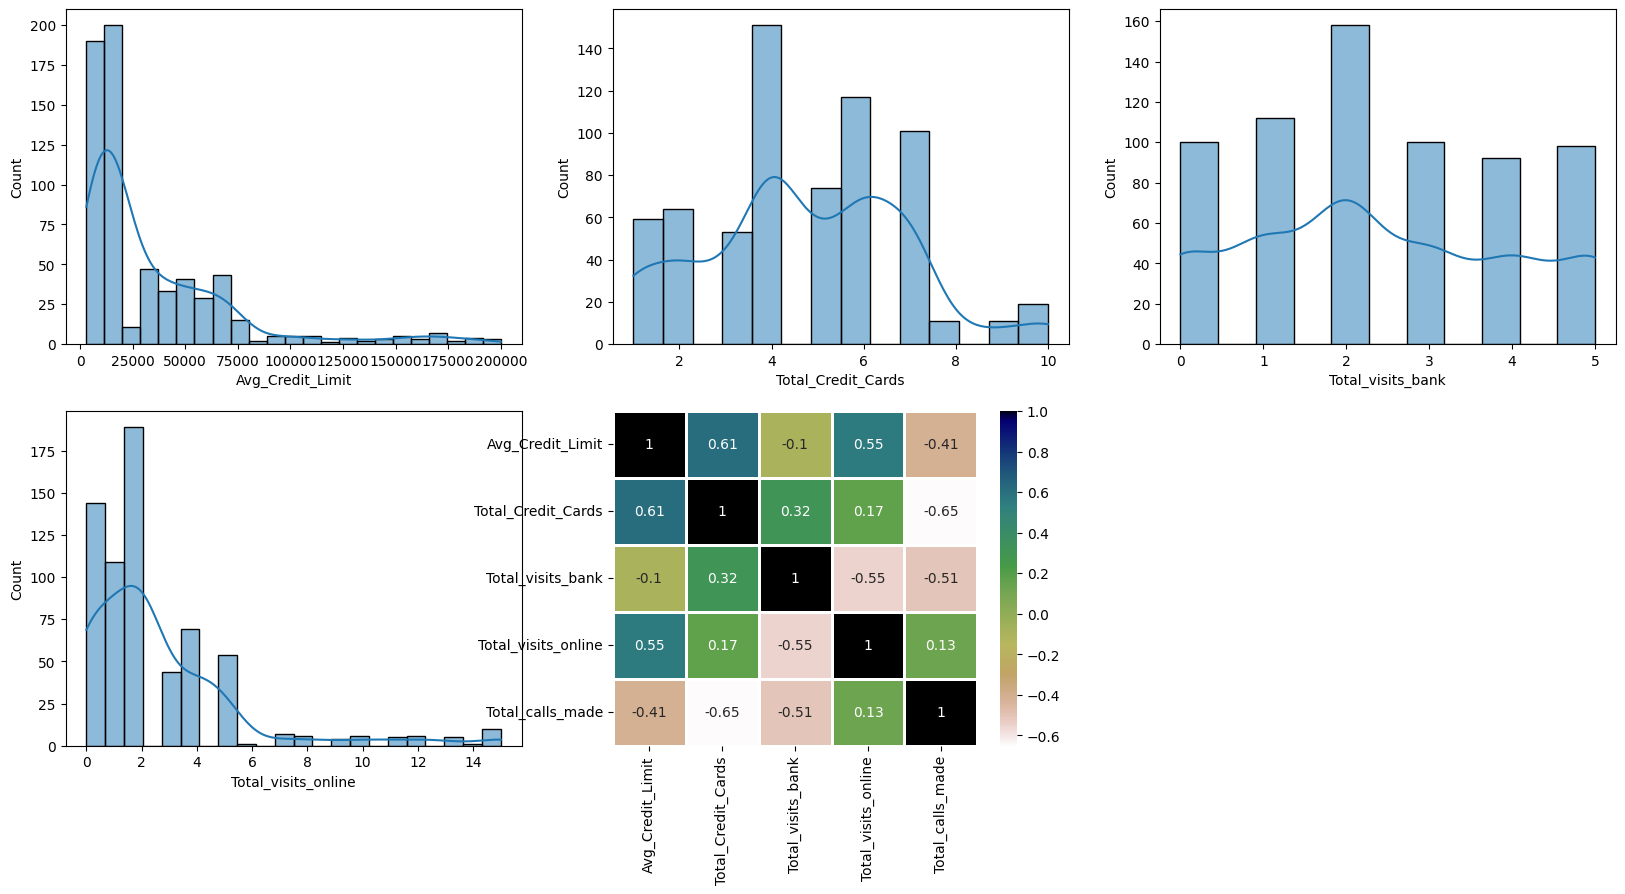

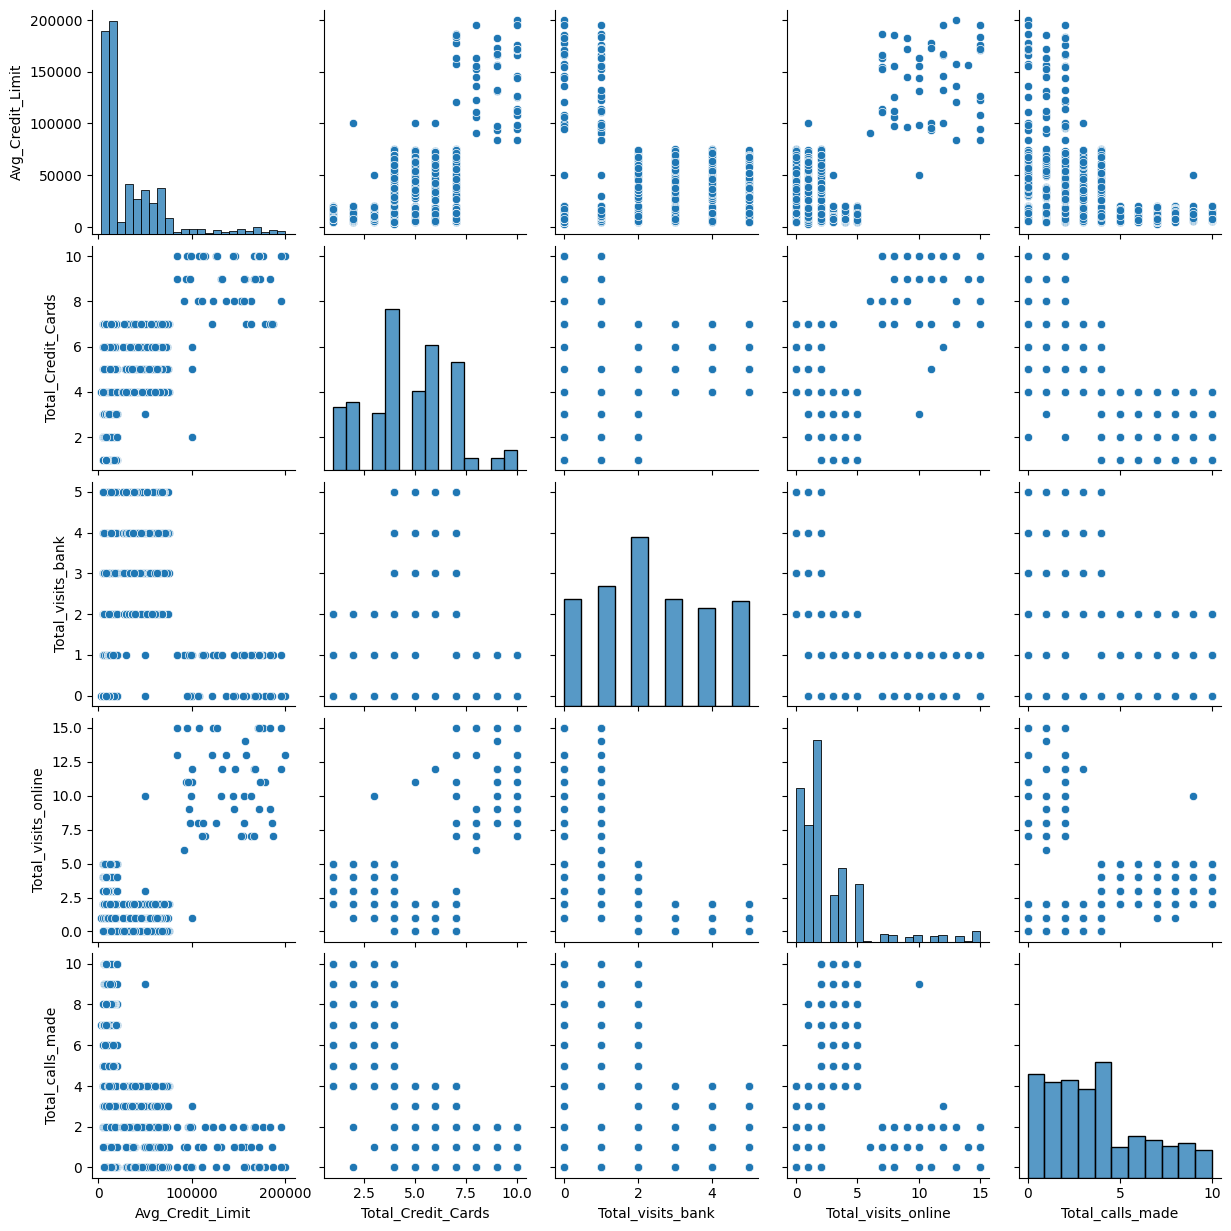

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

i = 1
plt.figure(figsize=(20, 20))
for j in df.columns:
    plt.subplot(4, 3, i)
    sns.boxplot(data=df, x=j)
    i += 1

i = 1
plt.figure(figsize=(20, 20))
for j in df.columns:
    plt.subplot(4, 3, i)
    sns.histplot(data=df, x=df[j], kde=True)
    i += 1

sns.heatmap(df.corr(), cmap='gist_earth_r', linewidths=1, annot=True)
sns.pairplot(df)


In [8]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
scaled = sc.fit_transform(df)
scaled_data = pd.DataFrame(scaled, columns=df.columns)
scaled_data


,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739
...,...,...,...,...,...
655,1.713589,2.443892,-0.860451,2.520519,-1.251537
656,1.314621,2.443892,-0.860451,3.543188,-0.553005
657,2.937092,1.520613,-0.860451,2.179629,-0.902271
658,3.655235,2.443892,-0.860451,4.224968,-1.251537


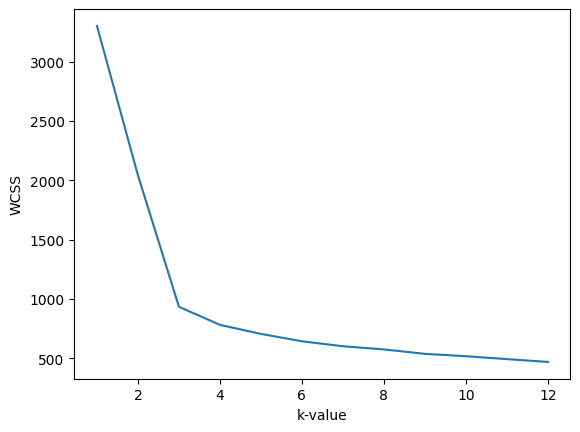

In [7]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 13):
    km = KMeans(n_clusters=i)
    km.fit(scaled_data)
    wcss.append(km.inertia_)

plt.plot(range(1, 13), wcss)
plt.ylabel('WCSS')
plt.xlabel('k-value')
plt.show()


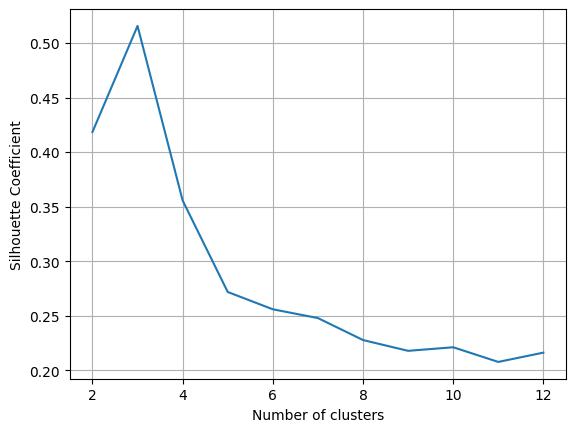

In [9]:
from sklearn.metrics import silhouette_score

slh_score = []
for i in range(2, 13):
    km = KMeans(n_clusters=i)
    km.fit(scaled_data)
    slh_score.append(silhouette_score(scaled_data, km.labels_))

plt.plot(range(2, 13), slh_score)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)
plt.show()


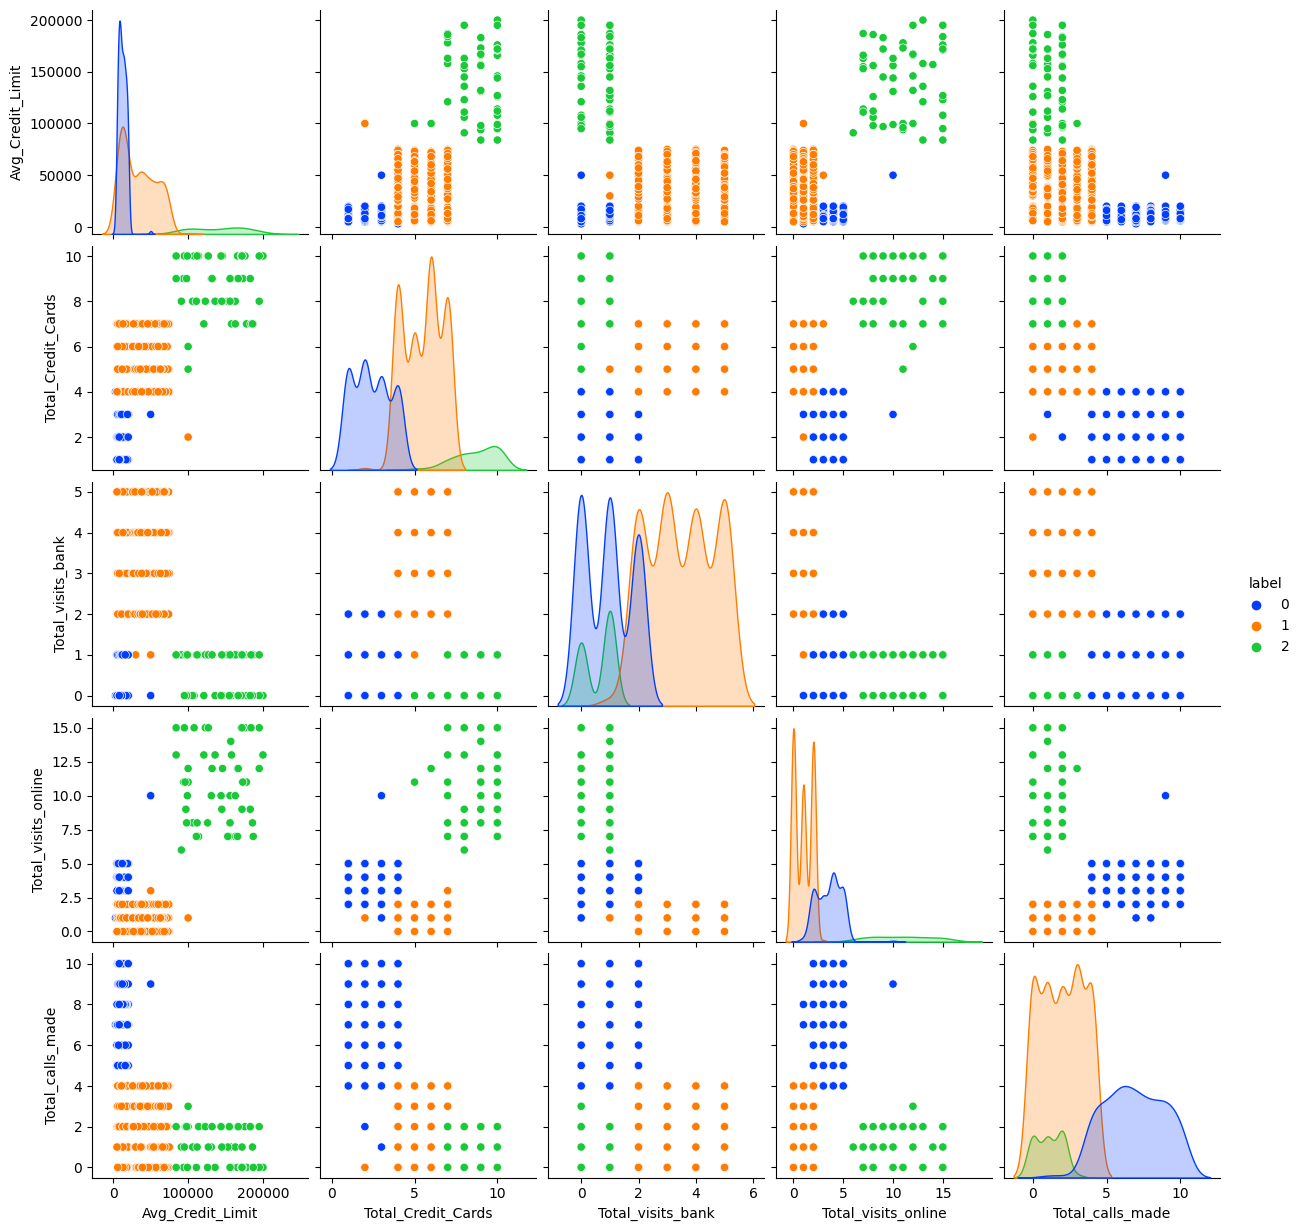

In [10]:
km1 = KMeans(n_clusters=3)
km1.fit(scaled_data)
y = km1.predict(scaled_data)
df['label'] = y

sns.pairplot(df, hue='label', palette='bright')
plt.show()


In [11]:
center = km1.cluster_centers_
Kmean_silhouette = silhouette_score(scaled_data, km1.labels_)
print("Coordinates of all centroids:")
print(center)
print("Silhouette score for the final model:", Kmean_silhouette)


Coordinates of all centroids:
[[-0.59579625 -1.05962278 -0.9015185   0.32299678  1.14810882]
 [-0.02106178  0.37368962  0.6663945  -0.55367163 -0.55300488]
 [ 2.83176409  1.86222621 -1.10576269  2.82731942 -0.87432983]]
Silhouette score for the final model: 0.5157182558881063
